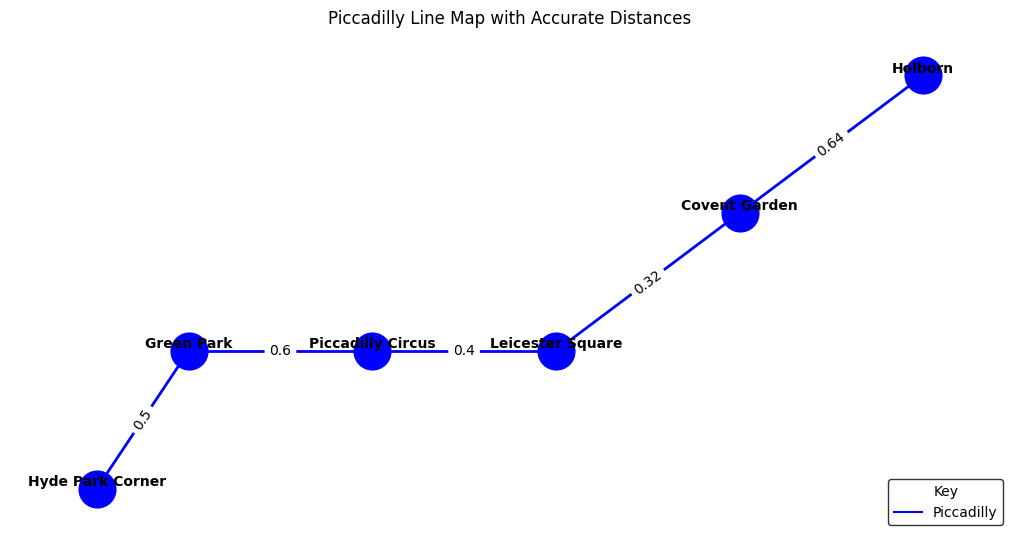

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph with accurate distances
G = nx.Graph()

# Define the stations and distances
stations = [
    ("Hyde Park Corner", "Green Park", 0.5),
    ("Green Park", "Piccadilly Circus", 0.6),
    ("Piccadilly Circus", "Leicester Square", 0.4),
    ("Leicester Square", "Covent Garden", 0.32),
    ("Covent Garden", "Holborn", 0.64)
]

# Add edges with weights (distances)
for station1, station2, distance in stations:
    G.add_edge(station1, station2, weight=distance)

# Define positions for nodes to match the layout
pos = {
    "Hyde Park Corner": (0, 0),
    "Green Park": (0.5, 1),
    "Piccadilly Circus": (1.5, 1),
    "Leicester Square": (2.5, 1),
    "Covent Garden": (3.5, 2),
    "Holborn": (4.5, 3)
}

# Draw nodes and edges
plt.figure(figsize=(10, 5))
nx.draw(G, pos, with_labels=True, node_color='blue', node_size=700, font_size=10,
         font_color="black", font_weight='bold', 
        edge_color='blue', width=2, verticalalignment='bottom')

# Draw edge labels with the distance values
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Add a legend for the Piccadilly line
plt.plot([], [], color="blue", label="Piccadilly")
plt.legend(loc="lower right", title="Key", frameon=True, edgecolor="black")

# Set plot title and show plot
plt.title("Piccadilly Line Map with Accurate Distances")
plt.show()

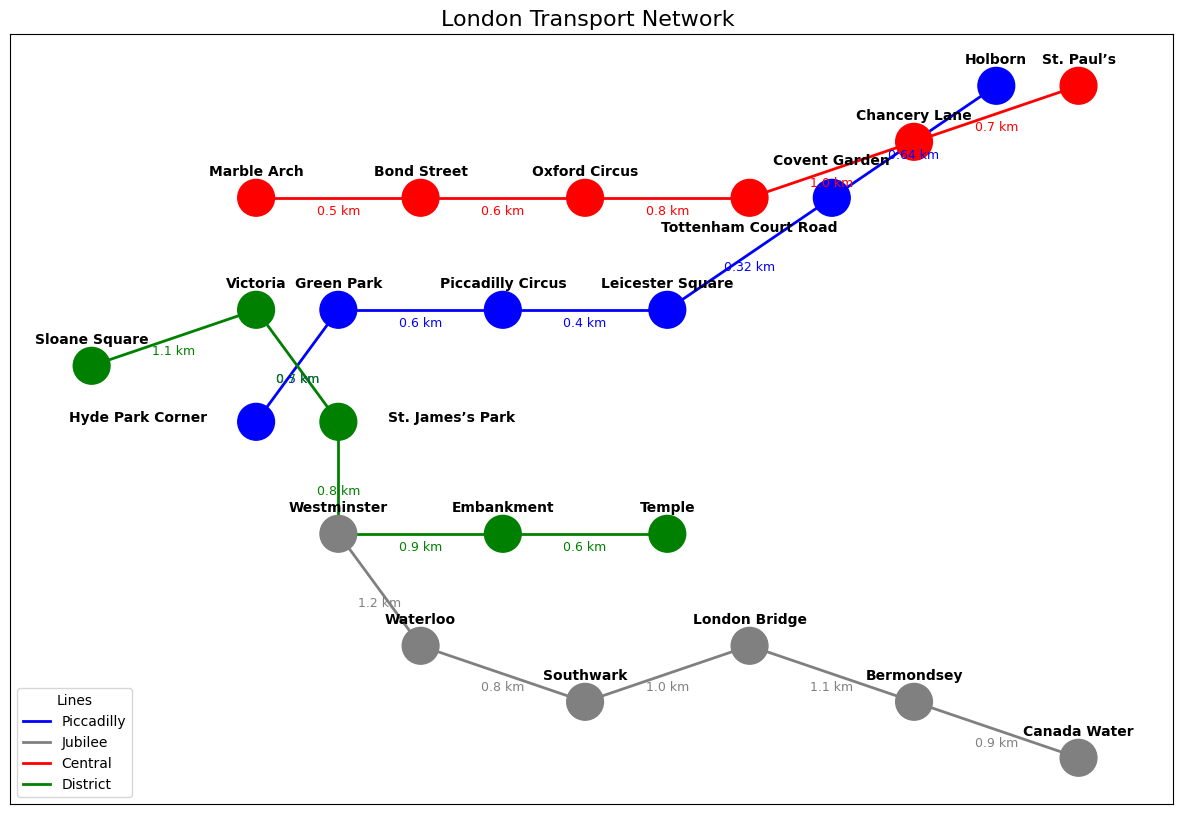

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a new graph
G = nx.Graph()

# Define the positions of the stations on a 2D plane
pos = {
    "Hyde Park Corner": (0, 0),
    "Green Park": (0.5, 1),
    "Piccadilly Circus": (1.5, 1),
    "Leicester Square": (2.5, 1),
    "Covent Garden": (3.5, 2),
    "Holborn": (4.5, 3),
    "Westminster": (0.5, -1),
    "Waterloo": (1, -2),
    "Southwark": (2, -2.5),
    "London Bridge": (3, -2),
    "Bermondsey": (4, -2.5),
    "Canada Water": (5, -3),
    "Marble Arch": (0, 2),
    "Bond Street": (1, 2),
    "Oxford Circus": (2, 2),
    "Tottenham Court Road": (3, 2),
    "Chancery Lane": (4, 2.5),
    "St. Paul’s": (5, 3),
    "Sloane Square": (-1, 0.5),
    "Victoria": (0, 1),
    "St. James’s Park": (0.5, 0),
    "Embankment": (1.5, -1),
    "Temple": (2.5, -1)
}

# Define the lines and distances between stations
lines_with_distances = {
    "Piccadilly": [
        ("Hyde Park Corner", "Green Park", 0.5),
        ("Green Park", "Piccadilly Circus", 0.6),
        ("Piccadilly Circus", "Leicester Square", 0.4),
        ("Leicester Square", "Covent Garden", 0.32),
        ("Covent Garden", "Holborn", 0.64)
    ],
    "Jubilee": [
        ("Westminster", "Waterloo", 1.2),
        ("Waterloo", "Southwark", 0.8),
        ("Southwark", "London Bridge", 1.0),
        ("London Bridge", "Bermondsey", 1.1),
        ("Bermondsey", "Canada Water", 0.9)
    ],
    "Central": [
        ("Marble Arch", "Bond Street", 0.5),
        ("Bond Street", "Oxford Circus", 0.6),
        ("Oxford Circus", "Tottenham Court Road", 0.8),
        ("Tottenham Court Road", "Chancery Lane", 1.0),
        ("Chancery Lane", "St. Paul’s", 0.7)
    ],
    "District": [
        ("Sloane Square", "Victoria", 1.1),
        ("Victoria", "St. James’s Park", 0.7),
        ("St. James’s Park", "Westminster", 0.8),
        ("Westminster", "Embankment", 0.9),
        ("Embankment", "Temple", 0.6)
    ]
}

# Add edges to the graph with distances and line information
for line, edges in lines_with_distances.items():
    for station1, station2, distance in edges:
        G.add_edge(station1, station2, weight=distance, line=line)

# Define colors for each line
line_colors = {
    "Piccadilly": "blue",
    "Jubilee": "gray",
    "Central": "red",
    "District": "green"
}

# Assign colors to each station based on the line they belong to
station_colors = {}
for line, edges in lines_with_distances.items():
    for station1, station2, _ in edges:
        if station1 not in station_colors:
            station_colors[station1] = line_colors[line]
        if station2 not in station_colors:
            station_colors[station2] = line_colors[line]

# Create a list of colors for each station node
node_colors = [station_colors[station] for station in pos.keys()]

# Set up the plot
plt.figure(figsize=(15, 10))

# Draw the edges of the graph
for line, edges in lines_with_distances.items():
    edge_list = [(station1, station2) for station1, station2, _ in edges]
    nx.draw_networkx_edges(G, pos, edgelist=edge_list, edge_color=line_colors[line], width=2, label=line)

# Draw the nodes of the graph
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=700)

# Add labels to the stations with slight adjustments to avoid overlap
for station, (x, y) in pos.items():
    if station == "Covent Garden":
        plt.text(x, y + 0.3, station, fontsize=10, fontweight="bold", color="black", ha="center")  
    elif station == "Tottenham Court Road":
        plt.text(x, y - 0.3, station, fontsize=10, fontweight="bold", color="black", ha="center") 
    elif station == "Hyde Park Corner":
        plt.text(x - 0.3, y, station, fontsize=10, fontweight="bold", color="black", ha="right") 
    elif station == "St. James’s Park":
        plt.text(x + 0.3, y, station, fontsize=10, fontweight="bold", color="black", ha="left") 
    else:
        plt.text(x, y + 0.2, station, fontsize=10, fontweight="bold", color="black", ha="center")  

# Add labels to the edges to display the distances between stations
edge_labels = nx.get_edge_attributes(G, "weight")
for (node1, node2), distance in edge_labels.items():
    x1, y1 = pos[node1]
    x2, y2 = pos[node2]
    xc, yc = (x1 + x2) / 2, (y1 + y2) / 2 
    plt.text(
        xc, yc - 0.15, f"{distance} km", fontsize=9, color=station_colors[node2], ha="center"
    )  

# Add a legend to indicate the color of each line and set the title of the plot
plt.legend(handles=[plt.Line2D([0], [0], color=color, lw=2) for color in line_colors.values()],
           labels=line_colors.keys(), loc="lower left", frameon=True, title="Lines")
plt.title("London Transport Network ", fontsize=16)
plt.show()

In [7]:
import numpy as np

# Extract all edge weights (distances)
distances = [data['weight'] for _, _, data in G.edges(data=True)]

# Task 3 calculations
# 1. Total length of the transport network
total_length = sum(distances)

# 2. Average distance between the stations
average_distance = np.mean(distances)

# 3. Standard deviation of the distances between the stations
std_deviation = np.std(distances)

# Print results
print(f"Total Length of Transport Network (km): {total_length:.2f}")
print(f"Average Distance Between Stations (km): {average_distance:.2f}")
print(f"Standard Deviation of Distances (km): {std_deviation:.2f}")


Total Length of Transport Network (km): 15.16
Average Distance Between Stations (km): 0.76
Standard Deviation of Distances (km): 0.24
